## Data Understanding

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('train.csv', skipinitialspace=True) 

In [3]:
pd.set_option('display.max_columns', None)
df.head()

name  duration_ms  explicit  popularity  \
0                             Long Road       241760     False          46   
1  Daniâl My Son, Where Did You Vanish?       444000     False           0   
2                    Ondskapens Galakse       333506     False           3   
3                       Can't Look Away       269800     False          23   
4                         Thunderground       307651     False          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0   -12.529   1.0       0.0975      0.302000           0.53600     0.281   
1   -24.801   0.0       0.0805      0.283000           0.93400     0.360   
2    -7.445   NaN       0.0397      0.000089           0.80000     0.262   
3    -5.607   1.0       0.0765      0.066400           0.00127     0.117   
4   -11.340   1.0       0.0539      0.000576           0.09690     0.299   

   valence    tempo  features_duration_ms  time_signature  n_beats  n_bars  \
0   0.6350  142.221                241760             4.0    567.0   141.0   
1   0.0336   75.596                444000             4.0    617.0   155.0   
2   0.4890  116.628                333507             4.0    652.0   162.0   
3   0.3850  140.880                269800             4.0    619.0   155.0   
4   0.6370  143.956                307652             4.0    733.0   183.0   

   popularity_confidence  processing        genre  
0                    NaN    1.279305      j-dance  
1                    NaN    2.367412      iranian  
2                    NaN    3.700483  black-metal  
3                  0.469    1.279305    bluegrass  
4                    NaN    4.067086        happy

## Data semantics



#### Description

- name: 			Name of the track
- duration_ms: 			The track length in milliseconds
- explicit: 			Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- popularity: 			The popularity of a track is a value between 0 and 100, with 100 being the most popular. 
- artists: 			The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: 	 		The album name in which the track appears
- danceability: 		Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable    
- energy: 			Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
- key:				The key the track is in. Integers map to pitches using standard Pitch Class notation. 
- loudness: 			The overall loudness of a track in decibels (dB)
- mode:				Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0
- speechiness: 			Speechiness detects the presence of spoken words in a track. 
- acousticness:			A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness:		Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0		
- liveness:			Detects the presence of an audience in the recording. 
- valence:			A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
- tempo:			The overall estimated tempo of a track in beats per minute (BPM). 
- features_duration_ms: 	The duration of the track in milliseconds
- time_signature:		An estimated time signature. 
- n_beats:			The total number of time intervals of beats throughout the track. 
- n_bars:			The total number of time intervals of the bars throughout the track. 
- popularity_confidence: 	The confidence, from 0.0 to 1.0, of the popularity of the song.
- genre:			The genre in which the track belongs
- processing:			????

In [4]:
df.shape

(15000, 24)

In [5]:
df.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

In [6]:
df.describe()

duration_ms    popularity  danceability        energy           key  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   2.468075e+05     27.423667      0.551063      0.656231      5.287867   
std    1.279941e+05     18.587534      0.194239      0.264371      3.585023   
min    8.586000e+03      0.000000      0.000000      0.000000      0.000000   
25%    1.800000e+05     14.000000      0.441000      0.480000      2.000000   
50%    2.278260e+05     24.000000      0.580000      0.709000      5.000000   
75%    2.889030e+05     42.000000      0.695000      0.884000      8.000000   
max    4.120258e+06     94.000000      0.980000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  15000.000000  10550.000000  15000.000000  15000.000000   
mean      -8.894999      0.631374      0.083779      0.303896   
std        6.005799      0.482455      0.086709      0.329536   
min      -49.531000      0.000000      0.000000      0.000000   
25%      -10.636250      0.000000      0.037300      0.009745   
50%       -7.303000      1.000000      0.051000      0.155000   
75%       -5.101000      1.000000      0.088600      0.573000   
max        3.156000      1.000000      0.939000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      15000.000000  15000.000000  15000.000000  15000.000000   
mean           0.286734      0.216790      0.436853    123.116544   
std            0.382930      0.195295      0.277220     31.930958   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.097900      0.196000     99.939000   
50%            0.003130      0.131000      0.416000    124.188000   
75%            0.744000      0.280000      0.664000    141.986500   
max            1.000000      0.994000      0.995000    220.525000   

       features_duration_ms  time_signature       n_beats       n_bars  \
count          1.500000e+04    12938.000000  15000.000000  15000.00000   
mean           2.467947e+05        3.876179    501.862333    128.39340   
std            1.279850e+05        0.566491    280.689804     75.11391   
min            8.587000e+03        0.000000      0.000000      0.00000   
25%            1.800000e+05        4.000000    327.000000     83.00000   
50%            2.278185e+05        4.000000    461.000000    117.00000   
75%            2.889030e+05        4.000000    625.000000    159.00000   
max            4.120258e+06        5.000000   7348.000000   2170.00000   

       popularity_confidence    processing  
count            2217.000000  15000.000000  
mean                0.490479      2.199647  
std                 0.291330      1.212616  
min                 0.000000      0.748116  
25%                 0.230000      1.170953  
50%                 0.480000      1.738916  
75%                 0.739000      3.349057  
max                 1.000000      4.067086

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [8]:
filtered_df = df[df['popularity_confidence'].notnull()]

# Show the resulting DataFrame
filtered_df

name  duration_ms  explicit  popularity  \
3                       Can't Look Away       269800     False          23   
36     Wir Ziehen Heut Abend Auf's Dach       210306     False          26   
47                 Long Hot Summer Days       288760     False          32   
49                Cloudy Daze - Ham Mix       323928     False          23   
52                     The Potters Hand       256093     False          43   
...                                 ...          ...       ...         ...   
14970                            Thrill       163404      True          62   
14980                  Banho de Piscina       202213     False          47   
14983                        Activating       323199     False           7   
14984               Deva Deva (Kannada)       276964     False          39   
14992               Follow You Anywhere       244982     False          45   

                                               artists  \
3                                    The Wood Brothers   
36                                        Jürgen Drews   
47                                       John Hartford   
49                                               Bang!   
52                                    Hillsong Worship   
...                                                ...   
14970                                   French The Kid   
14980                                   Clarice Falcão   
14983                        Alphaxone;XERXES THE DARK   
14984  Pritam;Sanjith Hegde;Arijit Singh;Jonita Gandhi   
14992                     Cosmic Gate;Nathan Nicholson   

                                              album_name  danceability  \
3                                      One Drop of Truth         0.523   
36                                      Musik Box Teil 1         0.631   
47                                            Mark Twang         0.591   
49                                           Cloudy Daze         0.593   
52                                Ultimate Worship Vol 1         0.301   
...                                                  ...           ...   
14970                                Never Been Ordinary         0.765   
14980                                       Problema Meu         0.654   
14983                                          Aftermath         0.184   
14984  Brahmastra (Kannada) [Original Motion Picture ...         0.560   
14992                                Follow You Anywhere         0.581   

       energy  key  loudness  mode  speechiness  acousticness  \
3       0.585    5    -5.607   1.0       0.0765       0.06640   
36      0.925    7    -5.591   0.0       0.0761       0.62700   
47      0.177    9   -17.299   1.0       0.0811       0.92600   
49      0.588   10   -14.420   NaN       0.0430       0.00315   
52      0.456    7    -6.606   1.0       0.0259       0.34000   
...       ...  ...       ...   ...          ...           ...   
14970   0.468    6   -11.390   0.0       0.2450       0.61600   
14980   0.707    9    -5.103   0.0       0.0326       0.26300   
14983   0.435    2   -22.193   NaN       0.2160       0.79300   
14984   0.730    0    -7.485   NaN       0.0377       0.64500   
14992   0.869    1    -6.700   0.0       0.0423       0.05640   

       instrumentalness  liveness  valence    tempo  features_duration_ms  \
3              0.001270    0.1170   0.3850  140.880                269800   
36             0.000004    0.4930   0.7990  124.061                210307   
47             0.001060    0.2940   0.5220   70.959                288760   
49             0.124000    0.0639   0.3280  169.857                323928   
52             0.000002    0.2050   0.1930   74.590                256093   
...                 ...       ...      ...      ...                   ...   
14970          0.000206    0.0950   0.4470  141.042                163404   
14980          0.000000    0.0736   0.7000  126.038                202214   
14983          0.906000    0.0797   0.

In [9]:
filtered_df.to_csv('train_2217.csv', index=False)

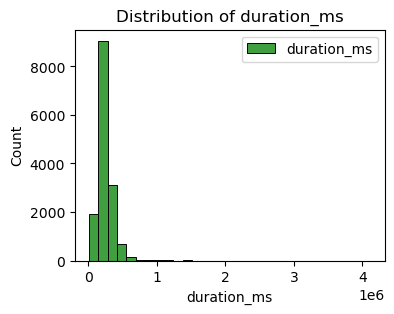

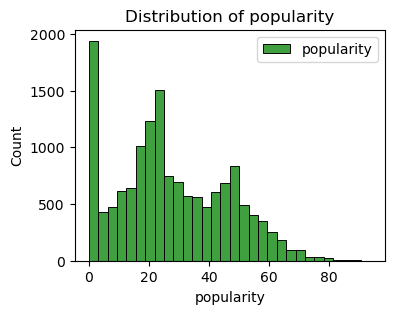

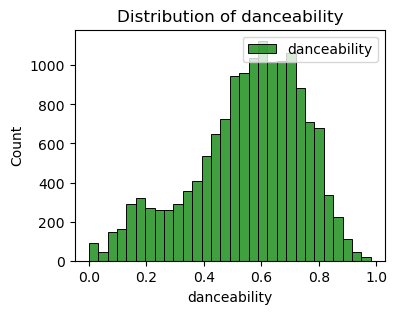

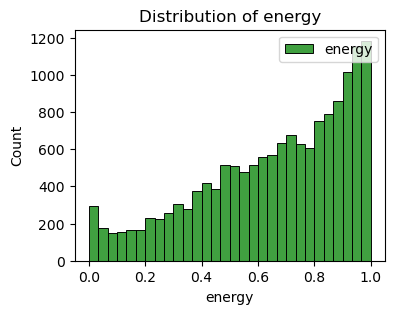

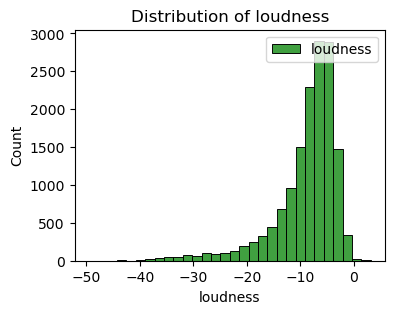

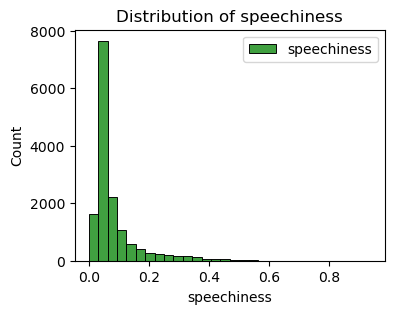

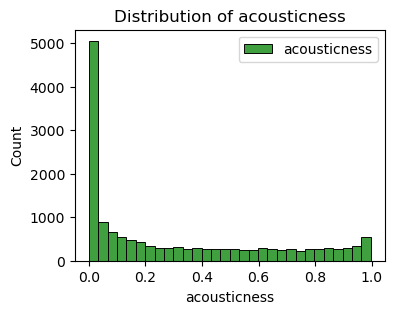

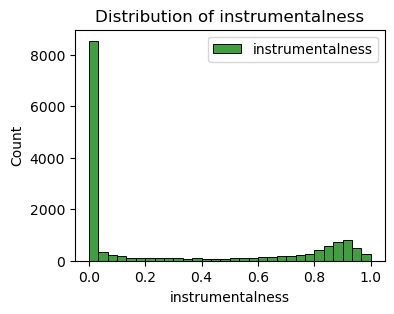

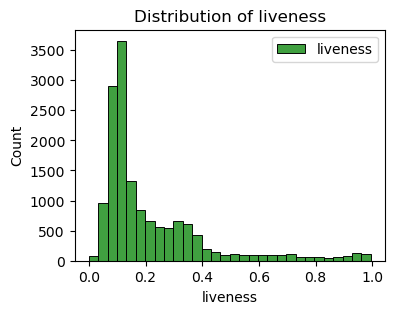

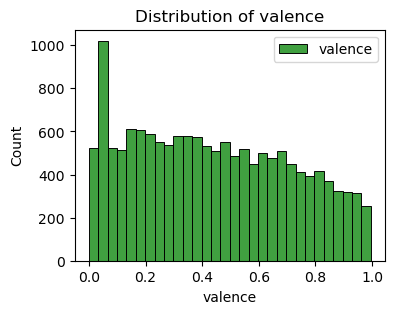

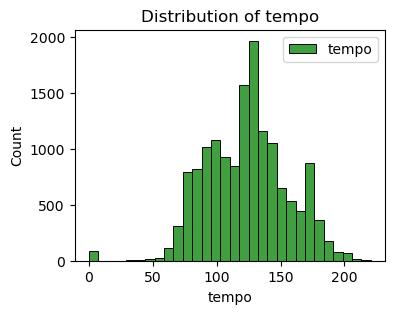

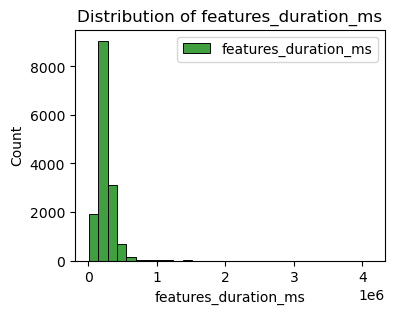

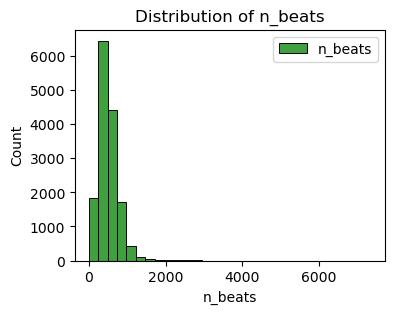

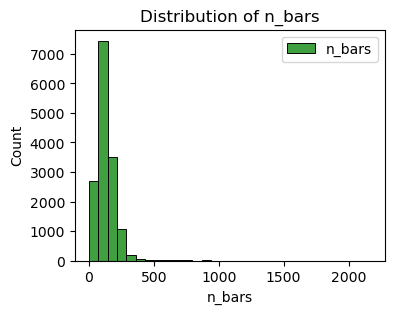

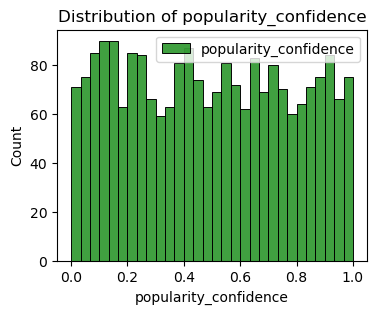

In [10]:
continuous_val = df[["duration_ms", "popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_ms", "n_beats", "n_bars", "popularity_confidence"]]

for i in continuous_val:
    plt.figure(figsize=(4,3))
    sns.histplot(df[i], bins=30, label=i, color='green')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {i}')
    plt.show()

 #### Bar plots for discrete values

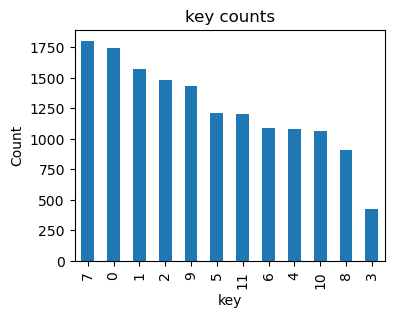

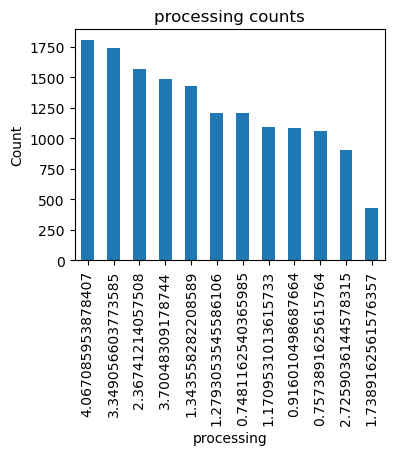

In [11]:
discrete_val = df[["key", "processing"]]

for column in discrete_val.columns:
    plt.figure(figsize=(4,3))
    discrete_val[column].value_counts().plot(kind='bar', title=f'{column} counts')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In this bar plots we can notice the following things:

1- The distributions for 'key' is the same as 'processing', which implies that they are somehow related, further anaylsis is needed.

2- The overall majority of tracks containd in the dataset are of time signature '4.0'.

3- About 7000 tracks are of mode '1' while roughly 4000 tracks are of mode '0', the total doesn't add up to 15000, which means there must be missing values for this attribute

#### Correlation heatmap

Elimination of non-numerical values as they interfered with the plotting

In [12]:
todrop = ['name','artists','album_name', 'explicit', 'genre']

nostrings = df.drop(columns = todrop)

nostrings.head()

duration_ms  popularity  danceability  energy  key  loudness  mode  \
0       241760          46         0.690   0.513    5   -12.529   1.0   
1       444000           0         0.069   0.196    1   -24.801   0.0   
2       333506           3         0.363   0.854    2    -7.445   NaN   
3       269800          23         0.523   0.585    5    -5.607   1.0   
4       307651          25         0.643   0.687    7   -11.340   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0975      0.302000           0.53600     0.281   0.6350  142.221   
1       0.0805      0.283000           0.93400     0.360   0.0336   75.596   
2       0.0397      0.000089           0.80000     0.262   0.4890  116.628   
3       0.0765      0.066400           0.00127     0.117   0.3850  140.880   
4       0.0539      0.000576           0.09690     0.299   0.6370  143.956   

   features_duration_ms  time_signature  n_beats  n_bars  \
0                241760             4.0    567.0   141.0   
1                444000             4.0    617.0   155.0   
2                333507             4.0    652.0   162.0   
3                269800             4.0    619.0   155.0   
4                307652             4.0    733.0   183.0   

   popularity_confidence  processing  
0                    NaN    1.279305  
1                    NaN    2.367412  
2                    NaN    3.700483  
3                  0.469    1.279305  
4                    NaN    4.067086

In [13]:
nostrings.shape

(15000, 19)

plt.figure(figsize=(15,6))
sns.heatmap(nostrings.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Overall correlations') # figure 2
plt.savefig('figure 2 og correlations .png')
plt.show()

Highly correlated attributes:

Positive (<0.50): 
- n_beats and features_duration_ms
- n_bars and features_duration_ms
- n_beats and duration_ms
- n_bars and duration_ms
- n_beats and n_bars
- danceability and valence
- loudness and energy

Negative (>0.50):
- acousticness and energy
- acousticness and loudnesss

Additional conclusions:
- 'features_duration_ms' and 'duration_ms' share the same correlations, this may imply that 'features_duration_ms' is similar if not the same as duratuion_ms, further analysis is needed to determine its usefulness

## Data quality

#### NaN-value counts

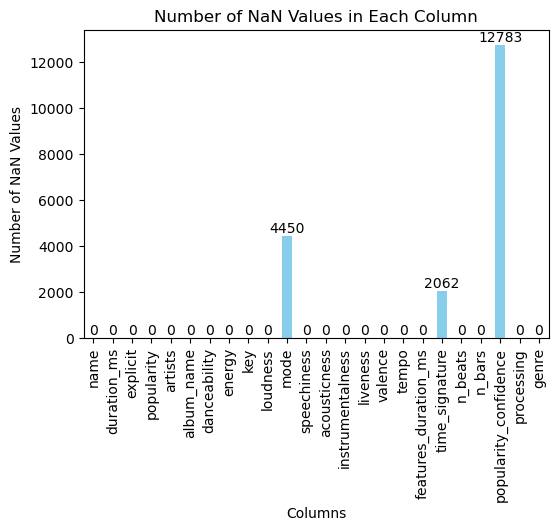

In [14]:
# Calculation of the number of NaN values in each column of the original dataframe
nan_counts = df.isna().sum()

# Bar chart
nan_counts.plot(kind='bar', figsize=(6, 4), color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

for i, value in enumerate(nan_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

This graph telss us the following:

1- there are too many NaN values in the 'popularity_confidence' attribute, this may lead us to drop it during the preparation phase.

2- We get confirmation of the missing values in the 'mode' attribute, further analysis is needed to determine whether to drop it or not.

3- The 'time_signature' attribute has a little over 2000 missing values, furthere analysis is needed to see if those could be filled.

#### Looking into 'duration_ms' and 'features_duration_ms'

In [15]:
duration = df[['duration_ms','features_duration_ms']]
duration

duration_ms  features_duration_ms
0           241760                241760
1           444000                444000
2           333506                333507
3           269800                269800
4           307651                307652
...            ...                   ...
14995       432026                432027
14996       182746                182747
14997       400091                400091
14998       197250                197250
14999       198409                198409

[15000 rows x 2 columns]

Conclusion:
- These are virtually the same, so we can just keep one of them.

#### Looking into 'popularity_confidence'

First we create a subset which includes both popularity-related columns:

In [16]:
popularity = df[['popularity', 'popularity_confidence']]
popularity.head()

popularity  popularity_confidence
0          46                    NaN
1           0                    NaN
2           3                    NaN
3          23                  0.469
4          25                    NaN

Now we eliminate the rows with NaN values:

In [17]:
target_column = 'popularity_confidence'

clean_popularity = popularity.dropna(subset=[target_column])

# Display the cleaned DataFrame
clean_popularity.shape

(2217, 2)

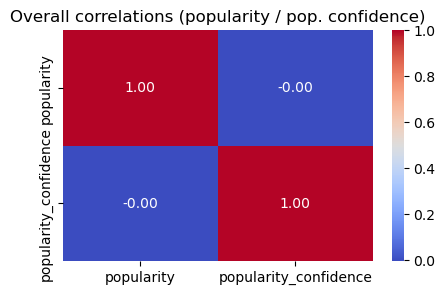

In [18]:
plt.figure(figsize=(5,3))
sns.heatmap(clean_popularity.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Overall correlations (popularity / pop. confidence)') #figure 5
#plt.savefig('figure 5 pop corr.png')
plt.show()

Conclusions:
- there is 0 correlation between both attributes, so we can safely drop 'popularity_confidence' as there is now known way to fill those missing values

#### Boxplots for numerical values

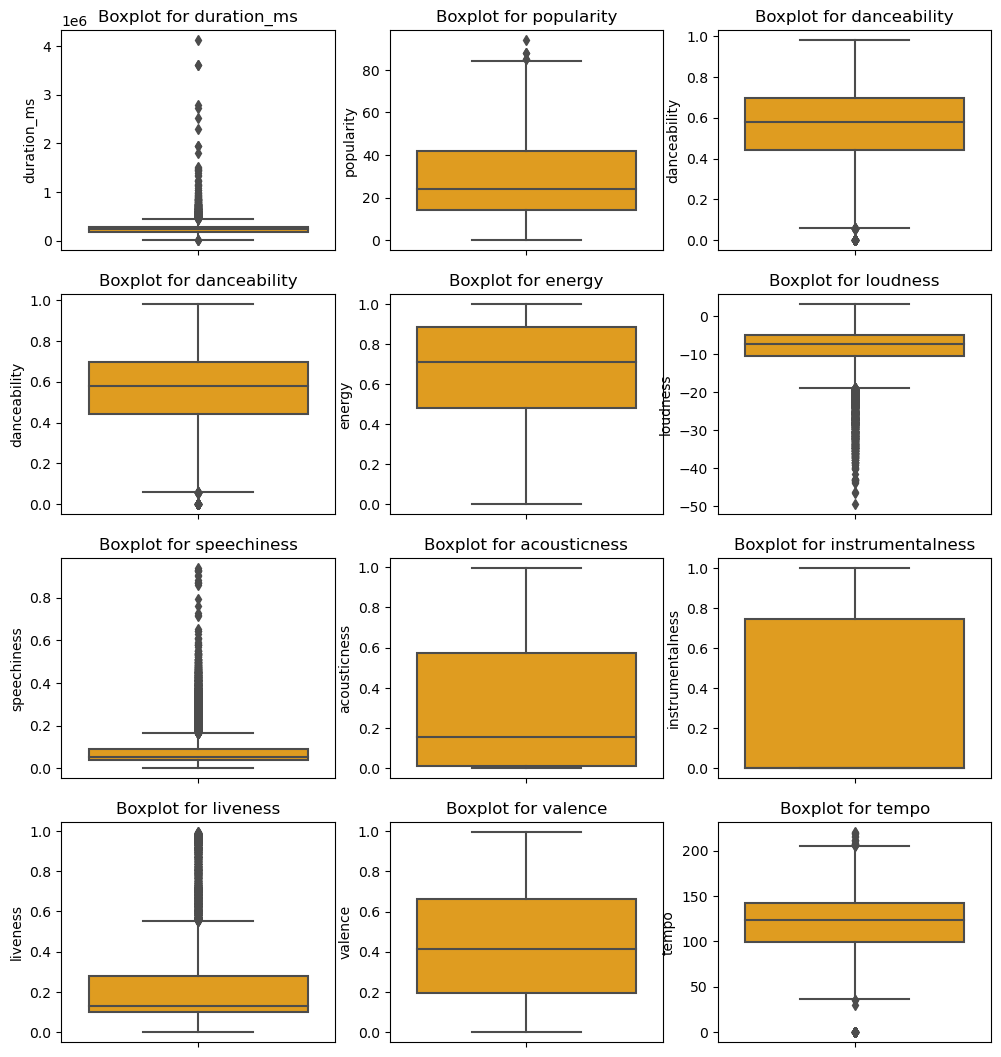

In [19]:
numericalvalues = ['duration_ms', 'popularity', 'danceability', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']



num_rows = (len(numericalvalues) + 1) // 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each interesting feature and create boxplots
for i, column in enumerate(numericalvalues):
    sns.boxplot(y=column, data=df, ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot for {column}')

# If there are empty subplots, remove the
for j in range(len(numericalvalues), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.savefig('figure 7 boxplot numerical .png')
plt.show()

#### Boxplots for continuous values

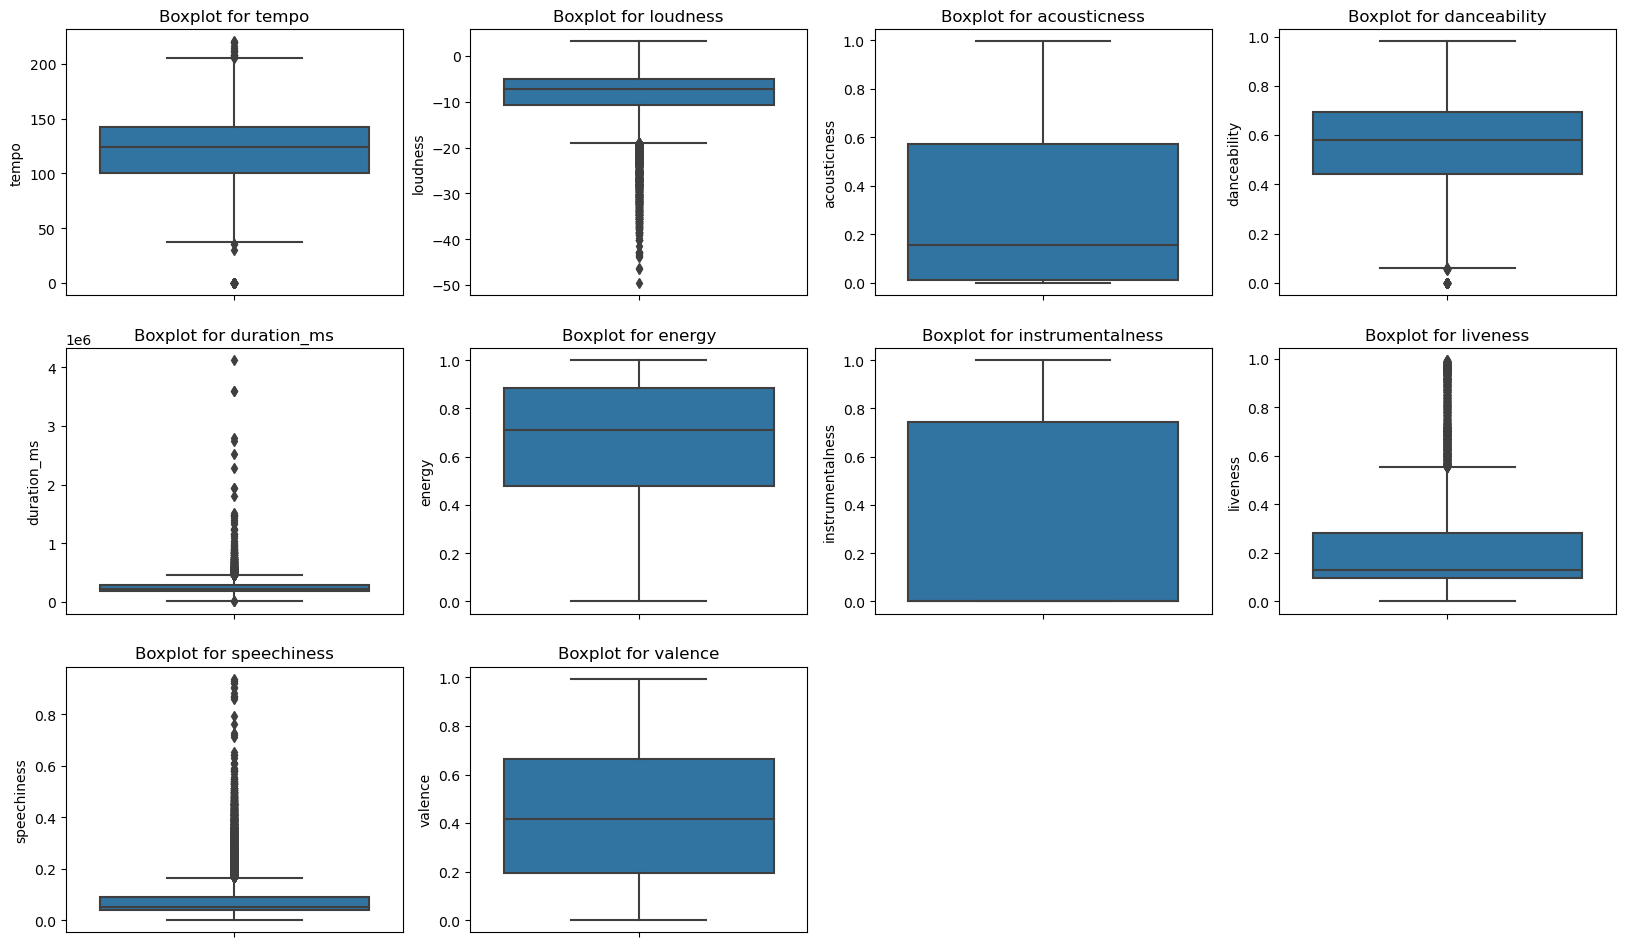

In [20]:
interestingFeatureColumns = ['tempo', 'loudness', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

num_rows = (len(interestingFeatureColumns) + 1) // 2
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each interesting feature and create boxplots
for i, column in enumerate(interestingFeatureColumns):
    sns.boxplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# If there are empty subplots, remove them
for j in range(len(interestingFeatureColumns), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

Conclusions:

- We can see that there are many outliers that must be dealt with before obtaining a sample.

#### Pairplot of the continuous values by genre

continuous_var = df[["duration_ms", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_ms", "n_beats", "n_bars", "popularity_confidence", "genre"]]

# Create pairplot with hue
sns.pairplot(continuous_var)

# Show the plot
plt.show()

Conclusions:
    
- Sadly, there are too many value with too much noise, the pairplot must be done again after drawing a sample for better understanding.
- Although we can see the visual representation of the correlations (both positive and negative) previously seen in the heatmap.

## Data cleaning

#### Dropping unnecessary attributes

In [21]:
columns_to_drop = ['features_duration_ms', 'processing', 'popularity_confidence', 'mode', 'time_signature', 'explicit','n_bars', 'n_beats']

clean_df = df.drop(columns = columns_to_drop)

clean_df.head()

name  duration_ms  popularity  \
0                             Long Road       241760          46   
1  Daniâl My Son, Where Did You Vanish?       444000           0   
2                    Ondskapens Galakse       333506           3   
3                       Can't Look Away       269800          23   
4                         Thunderground       307651          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -12.529       0.0975      0.302000           0.53600     0.281   0.6350   
1   -24.801       0.0805      0.283000           0.93400     0.360   0.0336   
2    -7.445       0.0397      0.000089           0.80000     0.262   0.4890   
3    -5.607       0.0765      0.066400           0.00127     0.117   0.3850   
4   -11.340       0.0539      0.000576           0.09690     0.299   0.6370   

     tempo        genre  
0  142.221      j-dance  
1   75.596      iranian  
2  116.628  black-metal  
3  140.880    bluegrass  
4  143.956        happy

In [22]:
clean_df.shape

(15000, 16)

Justification for the drops:
- 'features_duration_ms' is a redundant attribute as it contains the same information as 'duration_ms'
- 'processing' provides no information other than having a similar count as 'key'
- 'popularity_confidence' too many NaN values and has little to do with 'popularity' since it's unlikely we can recover such values using the latter attribute.

#### Outlier removal

##### - Removal of regular outliers

In [23]:
numerical_columns = clean_df.select_dtypes(include=['number']).columns

# Check if there are any numerical columns
if not numerical_columns.empty:
    # Calculate z-scores only for numerical columns
    z_scores = stats.zscore(clean_df[numerical_columns])

    # Set a z-score threshold
    z_threshold = 1.5

    # Filter outliers based on numerical columns
    clean_df_no_outliers = clean_df[(abs(z_scores) < z_threshold).all(axis=1)]
else:
    # Handle the case where there are no numerical columns
    clean_df_no_outliers = df.copy()

# Display the result
clean_df_no_outliers.head()

name  duration_ms  popularity                 artists  \
0           Long Road       241760          46           Funki Porcini   
2  Ondskapens Galakse       333506           3               Kvelertak   
3     Can't Look Away       269800          23       The Wood Brothers   
4       Thunderground       307651          25  The Darkraver;DJ Vince   
5      Sick Bubblegum       224266          32              Rob Zombie   

                               album_name  danceability  energy  key  \
0                           Hed Phone Sex         0.690   0.513    5   
2                              Nattesferd         0.363   0.854    2   
3                       One Drop of Truth         0.523   0.585    5   
4                  Happy Hardcore Top 100         0.643   0.687    7   
5  Hellbilly Deluxe 2 (Standard Explicit)         0.642   0.972    5   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -12.529       0.0975      0.302000          0.536000     0.281    0.635   
2    -7.445       0.0397      0.000089          0.800000     0.262    0.489   
3    -5.607       0.0765      0.066400          0.001270     0.117    0.385   
4   -11.340       0.0539      0.000576          0.096900     0.299    0.637   
5    -3.047       0.0967      0.001520          0.000024     0.384    0.421   

     tempo        genre  
0  142.221      j-dance  
2  116.628  black-metal  
3  140.880    bluegrass  
4  143.956        happy  
5  118.035   industrial

In [24]:
clean_df_no_outliers.shape

(5230, 16)

#### genre count for reg. outliers

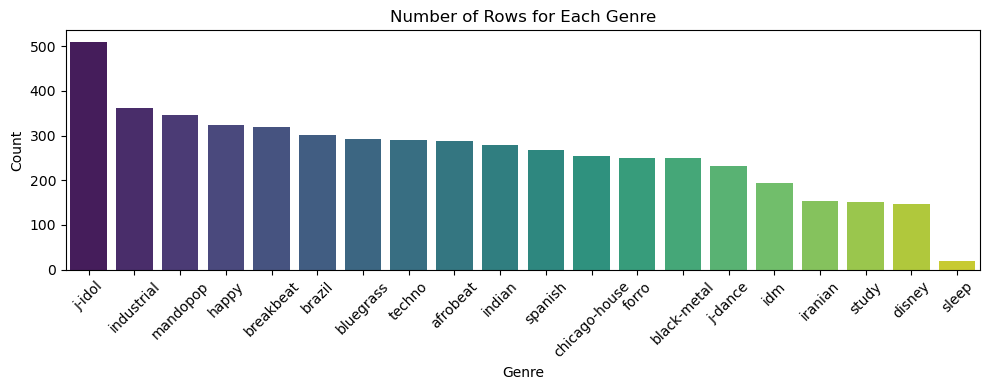

In [25]:
genre_counts = clean_df_no_outliers['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.savefig('gen count no outlier.png')
plt.show()

##### - Removal of extreme outliers

In [26]:
numerical_columns = clean_df.select_dtypes(include=['number']).columns

# Check if there are any numerical columns
if not numerical_columns.empty:
    # Calculate z-scores only for numerical columns
    z_scores = stats.zscore(clean_df[numerical_columns])

    # Set a z-score threshold
    z_threshold = 3

    # Filter outliers based on numerical columns
    clean_df_no_ext_outliers = clean_df[(abs(z_scores) < z_threshold).all(axis=1)]
else:
    # Handle the case where there are no numerical columns
    clean_df_no_ext_outliers = df.copy()

# Display the result
clean_df_no_ext_outliers.head()

name  duration_ms  popularity  \
0                             Long Road       241760          46   
1  Daniâl My Son, Where Did You Vanish?       444000           0   
2                    Ondskapens Galakse       333506           3   
3                       Can't Look Away       269800          23   
4                         Thunderground       307651          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -12.529       0.0975      0.302000           0.53600     0.281   0.6350   
1   -24.801       0.0805      0.283000           0.93400     0.360   0.0336   
2    -7.445       0.0397      0.000089           0.80000     0.262   0.4890   
3    -5.607       0.0765      0.066400           0.00127     0.117   0.3850   
4   -11.340       0.0539      0.000576           0.09690     0.299   0.6370   

     tempo        genre  
0  142.221      j-dance  
1   75.596      iranian  
2  116.628  black-metal  
3  140.880    bluegrass  
4  143.956        happy

In [27]:
clean_df_no_ext_outliers.shape

(13571, 16)

#### genre count ext. outliers GONE

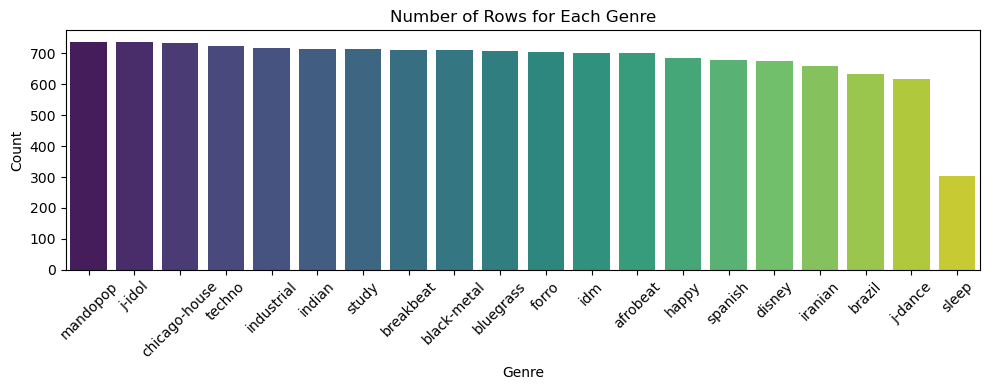

In [28]:
genre_counts = clean_df_no_ext_outliers['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.savefig('gen count no outlier.png')

plt.show()

Conclusion:

- Since eliminating regular outlies eliminates a little under 33.3% of rows, it was decided that it was best to proceed with the df created after the elimination of extreme outliers only

#### Variable transformation

First we divide 'duration_ms' by 1000 in order to get the value in seconds for better visualization:

In [29]:
clean_df_no_ext_outliers['duration'] = clean_df_no_ext_outliers['duration_ms'] // 1000

# Remove the last column from the DataFrame
last_column = clean_df_no_ext_outliers.pop('duration')

clean_df_no_ext_outliers.insert(1, 'duration', last_column)

# Drop the original column from the DataFrame
clean_df_no_ext_outliers.drop('duration_ms', axis=1, inplace=True)

clean_df_no_ext_outliers.head()


C:\Users\javie\AppData\Local\Temp\ipykernel_10376\2476147471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_no_ext_outliers['duration'] = clean_df_no_ext_outliers['duration_ms'] // 1000
C:\Users\javie\AppData\Local\Temp\ipykernel_10376\2476147471.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_no_ext_outliers.drop('duration_ms', axis=1, inplace=True)


name  duration  popularity  \
0                             Long Road       241          46   
1  Daniâl My Son, Where Did You Vanish?       444           0   
2                    Ondskapens Galakse       333           3   
3                       Can't Look Away       269          23   
4                         Thunderground       307          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0   -12.529       0.0975      0.302000           0.53600     0.281   0.6350   
1   -24.801       0.0805      0.283000           0.93400     0.360   0.0336   
2    -7.445       0.0397      0.000089           0.80000     0.262   0.4890   
3    -5.607       0.0765      0.066400           0.00127     0.117   0.3850   
4   -11.340       0.0539      0.000576           0.09690     0.299   0.6370   

     tempo        genre  
0  142.221      j-dance  
1   75.596      iranian  
2  116.628  black-metal  
3  140.880    bluegrass  
4  143.956        happy

#### Correlation of clean DF with no extreme outliers


In [30]:
todrop = ['name','artists','album_name', 'genre']

new_nostrings = clean_df_no_ext_outliers.drop(columns = todrop)

new_nostrings.head()

duration  popularity  danceability  energy  key  loudness  speechiness  \
0       241          46         0.690   0.513    5   -12.529       0.0975   
1       444           0         0.069   0.196    1   -24.801       0.0805   
2       333           3         0.363   0.854    2    -7.445       0.0397   
3       269          23         0.523   0.585    5    -5.607       0.0765   
4       307          25         0.643   0.687    7   -11.340       0.0539   

   acousticness  instrumentalness  liveness  valence    tempo  
0      0.302000           0.53600     0.281   0.6350  142.221  
1      0.283000           0.93400     0.360   0.0336   75.596  
2      0.000089           0.80000     0.262   0.4890  116.628  
3      0.066400           0.00127     0.117   0.3850  140.880  
4      0.000576           0.09690     0.299   0.6370  143.956

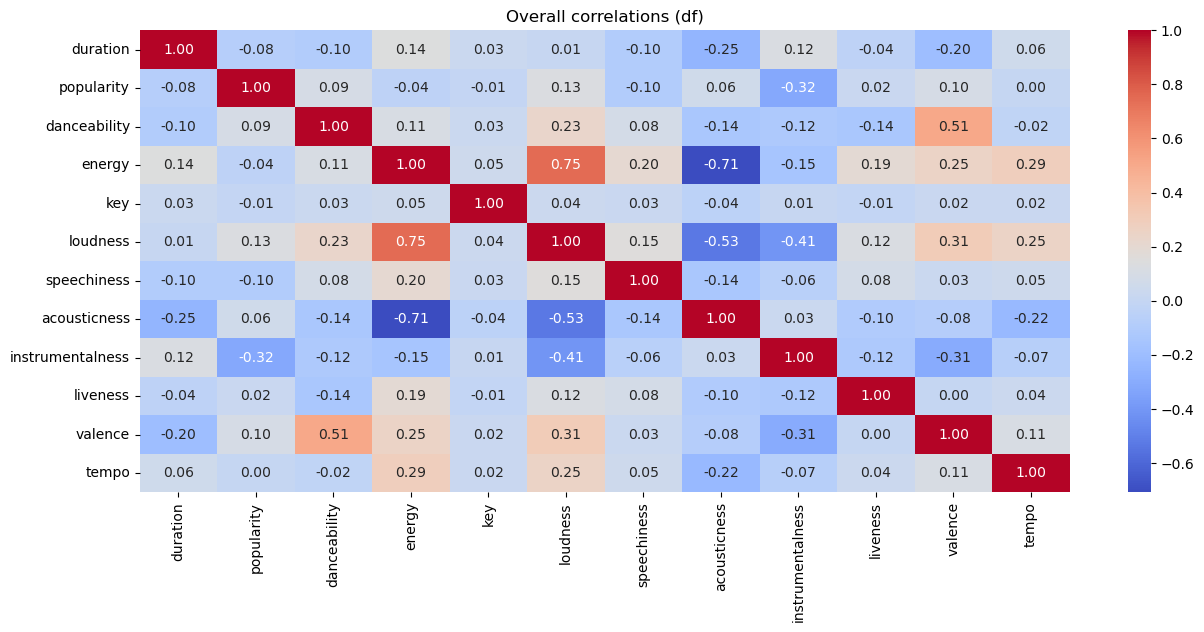

In [31]:
#new correlation matrix

plt.figure(figsize=(15,6))
sns.heatmap(new_nostrings.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Overall correlations (df)')
plt.show()

#### Sampling

In [32]:
sample_size = 1300  # Specify the desired sample size

# Use the sample() method to get a random sample of the DataFrame
sample = clean_df_no_ext_outliers.sample(n=sample_size, random_state=42)  # You can change the random_state for reproducibility

# Print or use the sample as needed
sample.head()

name  duration  popularity  \
3380                                 Chandamama       166          47   
7756                              Die for a Man       167           0   
10000  Pretos Ganhando Dinheiro Incomoda Demais       198          29   
9616                                under_score       128          32   
4754                                Rock Bottom       208          10   

                       artists                     album_name  danceability  \
3380                    Ritviz                          Mimmi         0.661   
7756   Bebe Rexha;Lil Uzi Vert                       All Bops         0.669   
10000                   Criolo                    Sobre Viver         0.637   
9616             Rafa Figueroa                    under_score         0.725   
4754                   Scooter  Who's Got the Last Laugh Now?         0.580   

       energy  key  loudness  speechiness  acousticness  instrumentalness  \
3380    0.374    9    -7.561       0.0605       0.01710          0.000000   
7756    0.893    4    -3.319       0.0372       0.07360          0.000000   
10000   0.715    0    -7.032       0.0740       0.05180          0.000046   
9616    0.194    9   -16.627       0.0393       0.68100          0.902000   
4754    0.988    8    -5.145       0.0696       0.00634          0.000684   

       liveness  valence    tempo      genre  
3380     0.0938    0.349   92.011     indian  
7756     0.1400    0.314   89.996  breakbeat  
10000    0.1220    0.347  109.859     brazil  
9616     0.0864    0.132   90.045      study  
4754     0.3210    0.239  143.066      happy

In [33]:
sample.shape

(1300, 16)

#### Sample correlation matrix

In [34]:
todrop = ['name','artists','album_name', 'genre']

new_nostrings_the_third = sample.drop(columns = todrop)

new_nostrings_the_third.head()

duration  popularity  danceability  energy  key  loudness  speechiness  \
3380        166          47         0.661   0.374    9    -7.561       0.0605   
7756        167           0         0.669   0.893    4    -3.319       0.0372   
10000       198          29         0.637   0.715    0    -7.032       0.0740   
9616        128          32         0.725   0.194    9   -16.627       0.0393   
4754        208          10         0.580   0.988    8    -5.145       0.0696   

       acousticness  instrumentalness  liveness  valence    tempo  
3380        0.01710          0.000000    0.0938    0.349   92.011  
7756        0.07360          0.000000    0.1400    0.314   89.996  
10000       0.05180          0.000046    0.1220    0.347  109.859  
9616        0.68100          0.902000    0.0864    0.132   90.045  
4754        0.00634          0.000684    0.3210    0.239  143.066

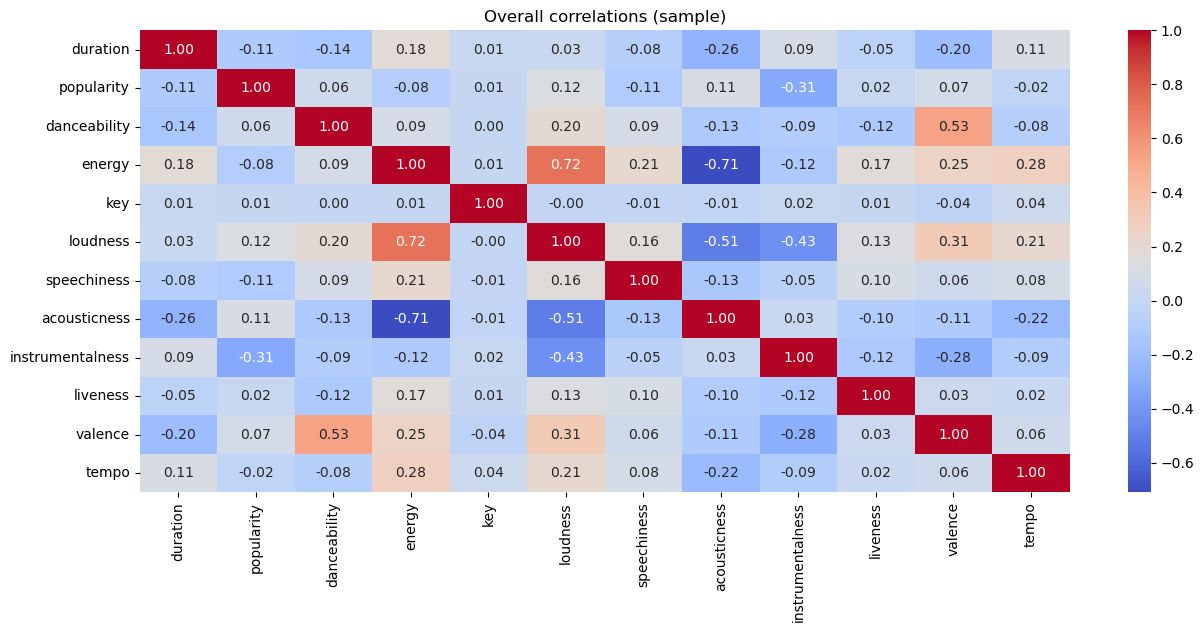

In [35]:
#new correlation matrix

plt.figure(figsize=(15,6))
sns.heatmap(new_nostrings_the_third.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Overall correlations (sample)')
plt.show()

In [36]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 3380 to 14864
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1300 non-null   object 
 1   duration          1300 non-null   int64  
 2   popularity        1300 non-null   int64  
 3   artists           1300 non-null   object 
 4   album_name        1300 non-null   object 
 5   danceability      1300 non-null   float64
 6   energy            1300 non-null   float64
 7   key               1300 non-null   int64  
 8   loudness          1300 non-null   float64
 9   speechiness       1300 non-null   float64
 10  acousticness      1300 non-null   float64
 11  instrumentalness  1300 non-null   float64
 12  liveness          1300 non-null   float64
 13  valence           1300 non-null   float64
 14  tempo             1300 non-null   float64
 15  genre             1300 non-null   object 
dtypes: float64(9), int64(3), object(4)
memory u

#### Sample distribution

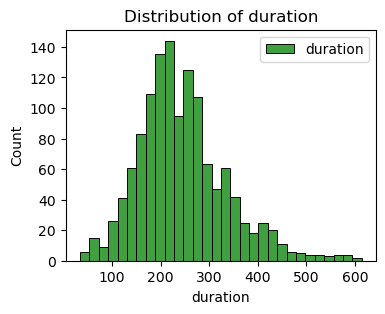

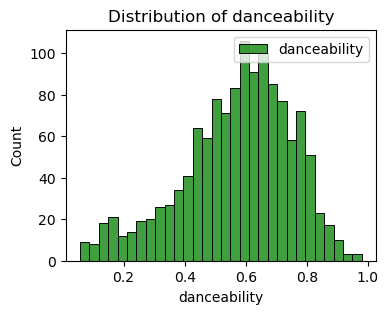

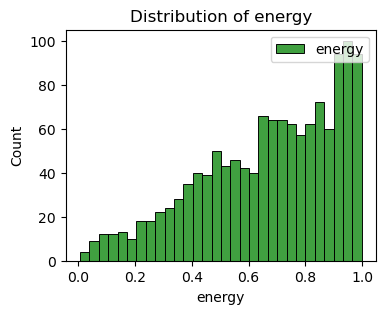

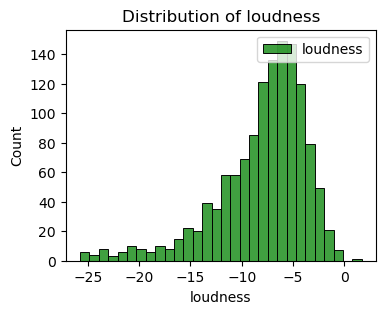

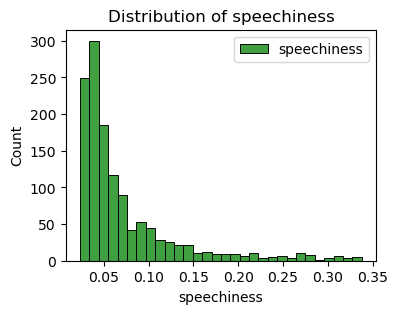

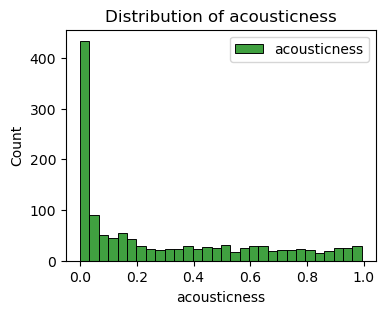

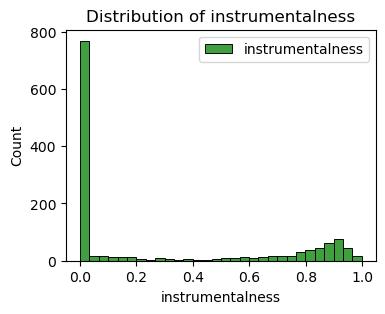

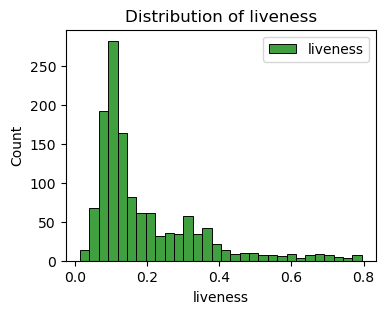

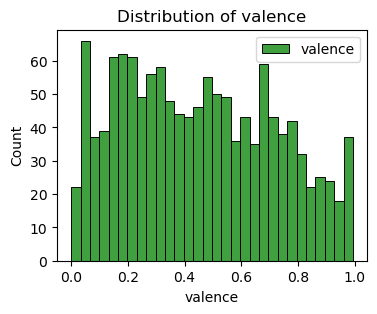

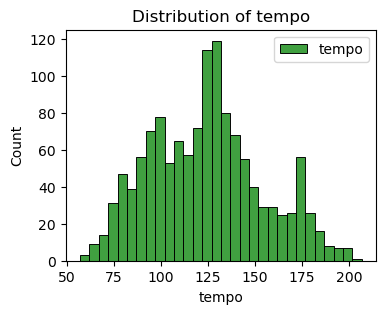

In [37]:
continuous_val = sample[["duration", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]

for i in continuous_val:
    plt.figure(figsize=(4,3))
    sns.histplot(sample[i], bins=30, label=i, color='green')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {i}')
    plt.show()

#### Sample pairplot

C:\Users\javie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\javie\AppData\Local\Temp\ipykernel_10376\72876897.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


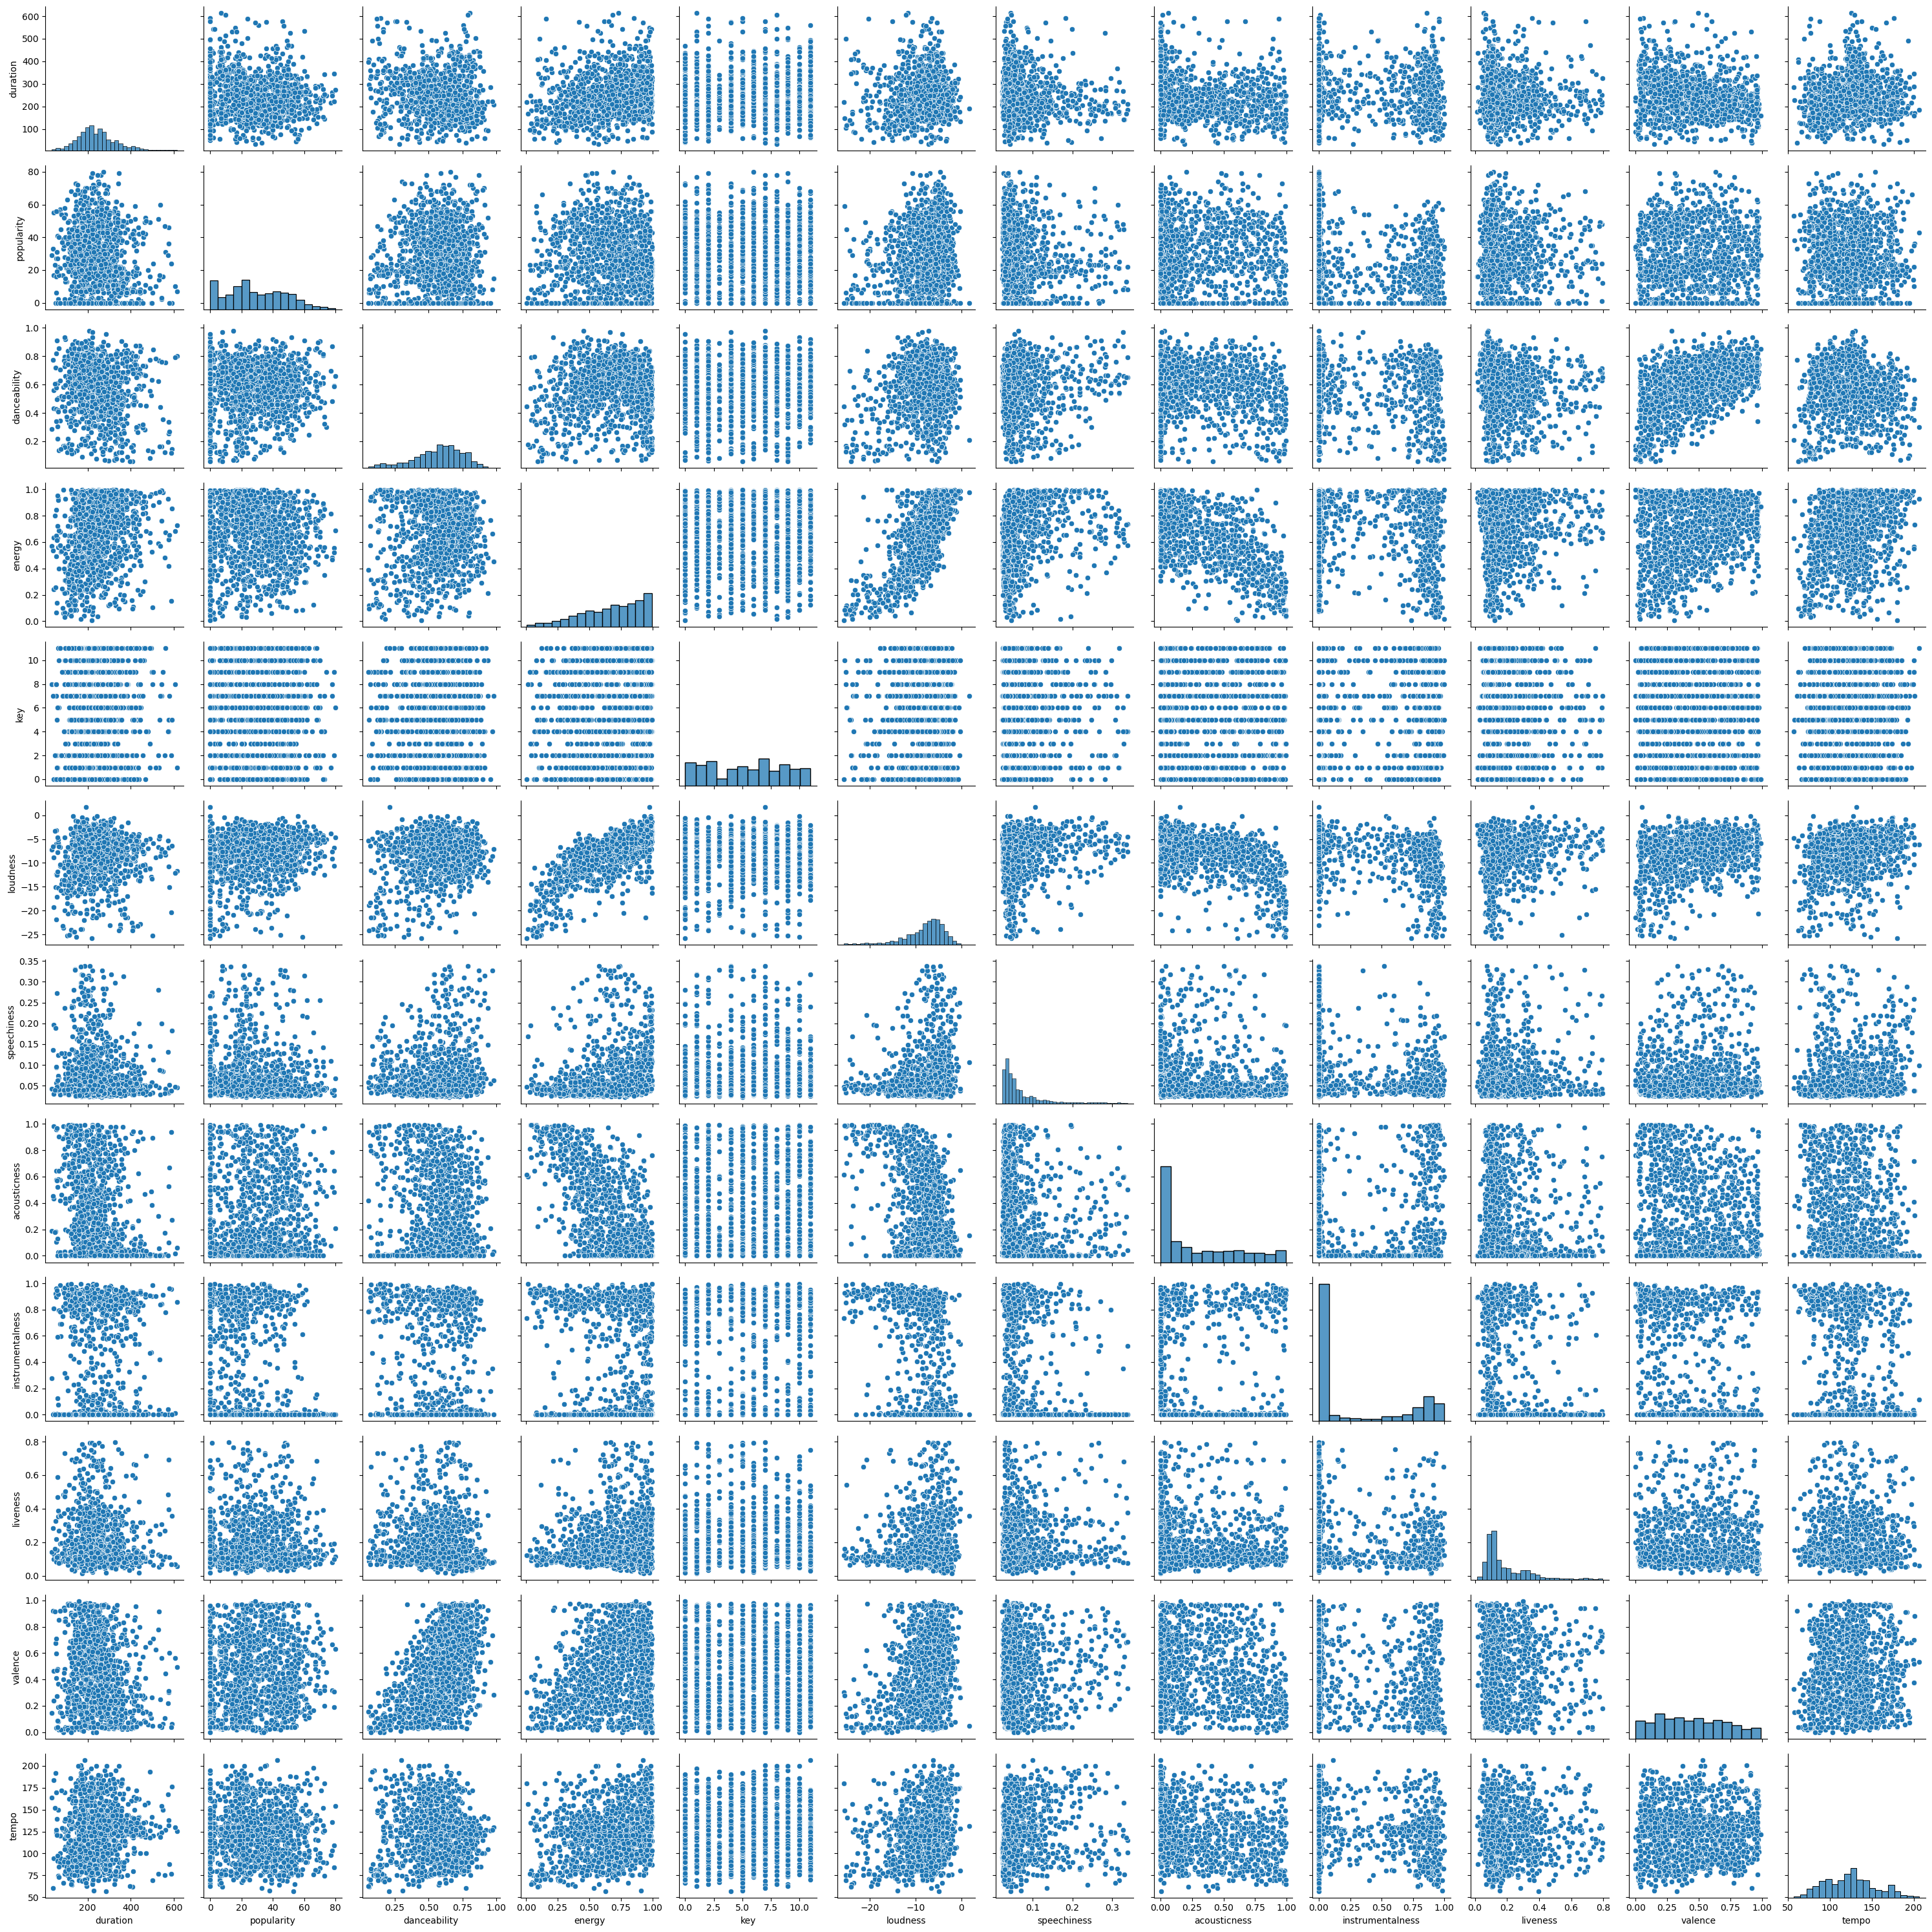

In [38]:
sns.pairplot(sample)
plt.tight_layout()
plt.show()